In [ ]:
import pandas as pd
df=pd.read_csv("/content/Diwali Sales Data.csv",encoding="latin1")
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.drop(labels="unnamed1",axis=1,inplace=True)

In [ ]:
df.drop(labels="Status",axis=1,inplace=True)

In [ ]:
df.dropna(subset=["Amount"],inplace=True)


In [ ]:
df["Amount"]=df["Amount"].astype("int")


In [ ]:
df.info()
df.isnull().sum()
df["Amount"].dtype

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


dtype('float64')

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
##Customer Distribution by Gender

<Axes: xlabel='Gender', ylabel='count'>

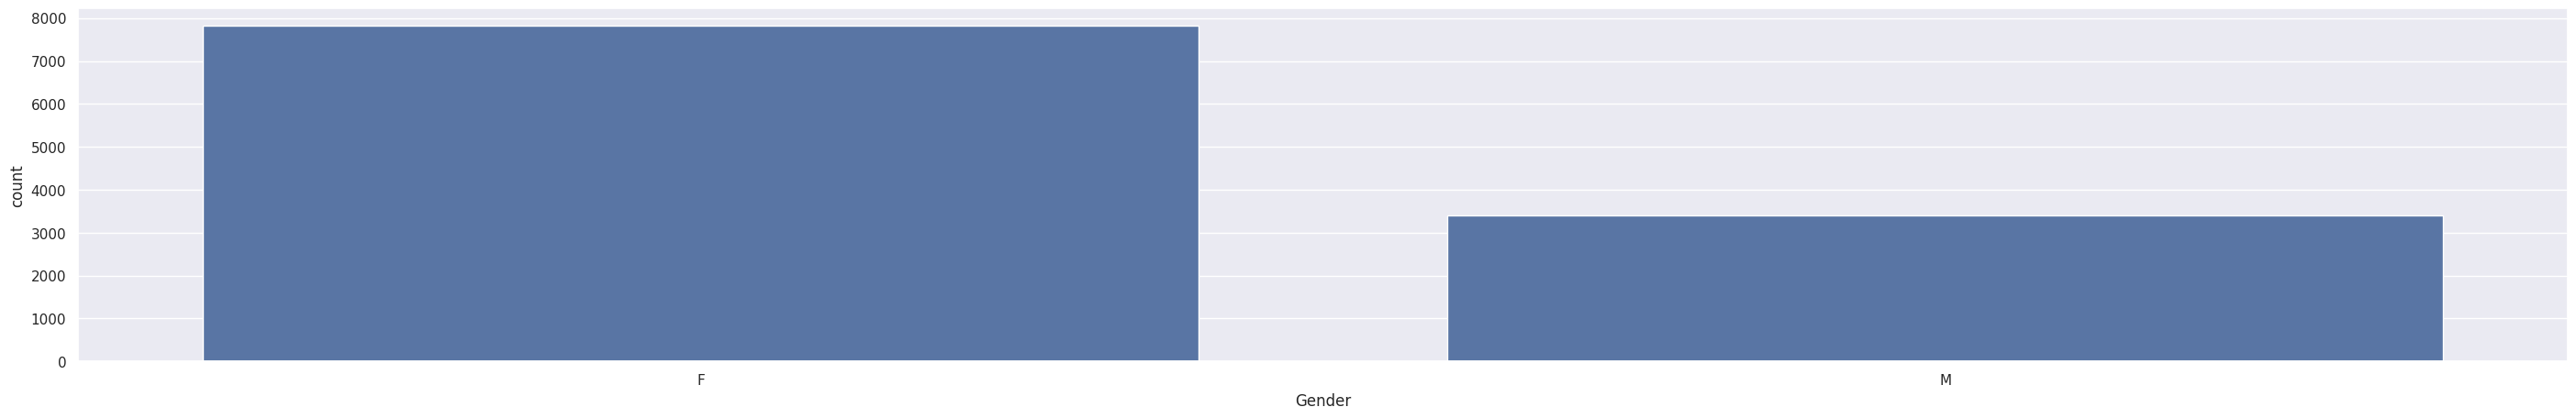

In [ ]:
sns.countplot(x="Gender",data=df)

In [ ]:
df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

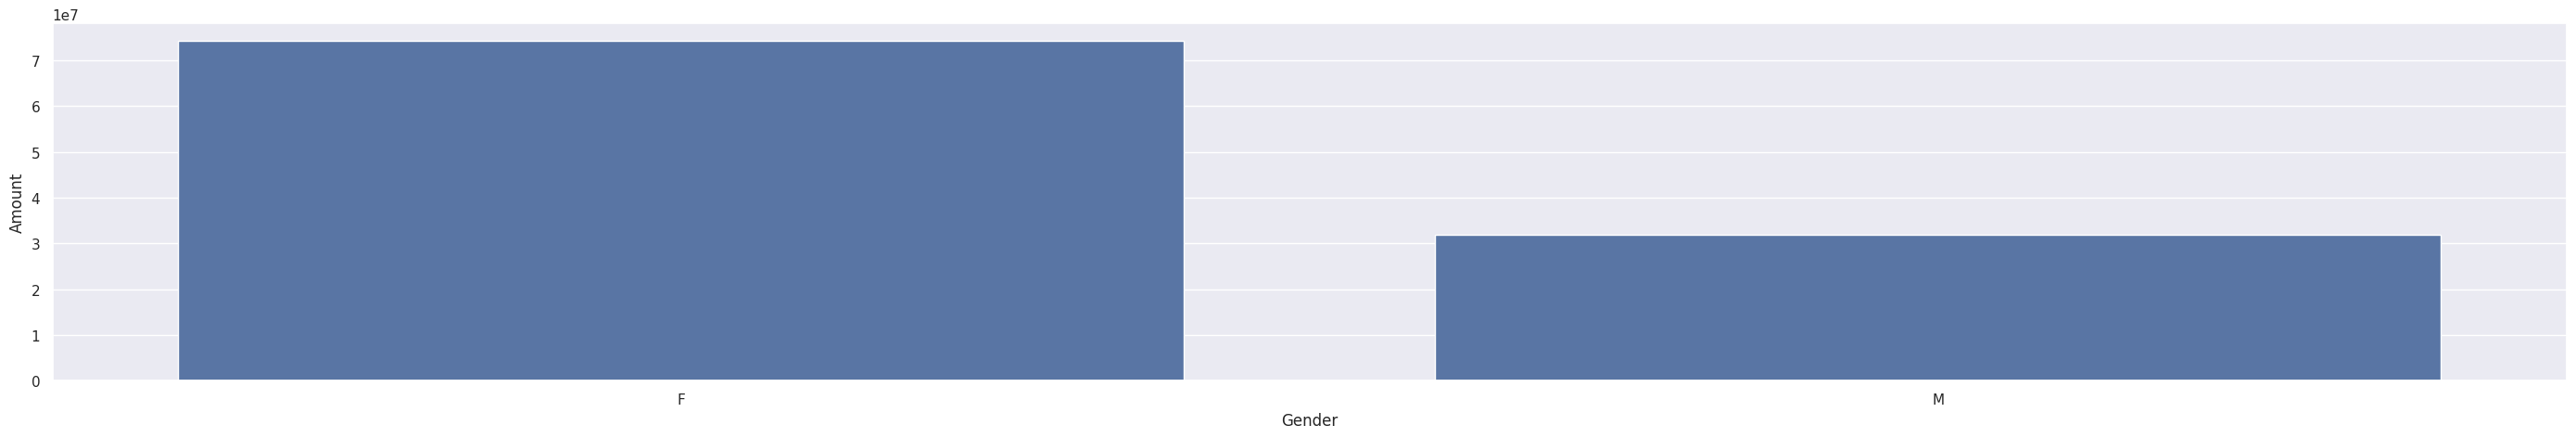

In [ ]:
sales_gen=df.groupby("Gender", as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(x="Gender",y="Amount",data=sales_gen)

In [ ]:
# Insight: Female customers (8000+) significantly outnumber male customers (3000+), representing about 70% of total customers. This indicates that our products have stronger appeal among women, and marketing strategies should be tailored accordingly

In [ ]:
##Age Group Distribution by Gender

<Axes: xlabel='Age Group', ylabel='count'>

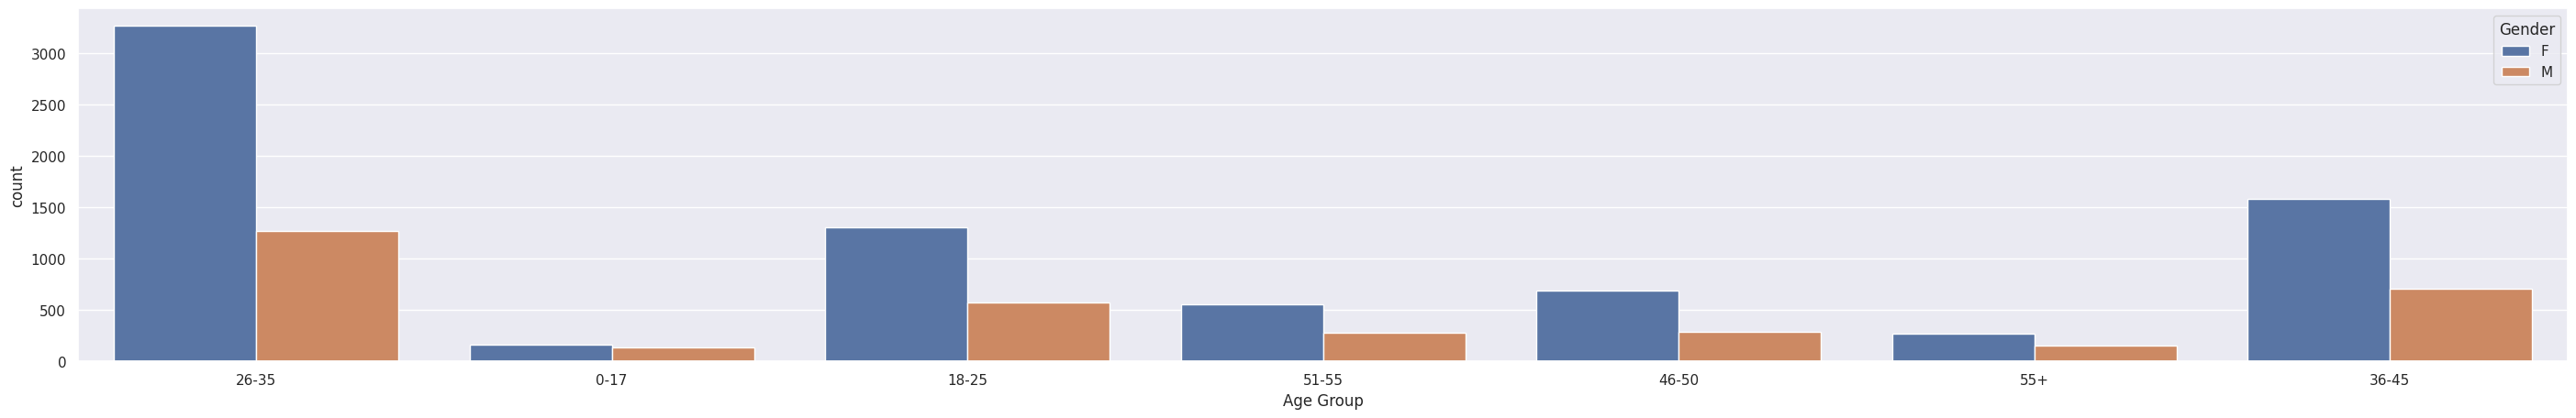

In [ ]:
sns.countplot(data=df,x="Age Group",hue="Gender")

In [ ]:
#Insight: The 26-35 age group has the highest number of customers, especially females. This young adult demographic is our primary target audience and should receive focused marketing campaigns and product development efforts.


In [ ]:
##Sales Orders by State

In [ ]:
state_sales=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)

<Axes: xlabel='State'>

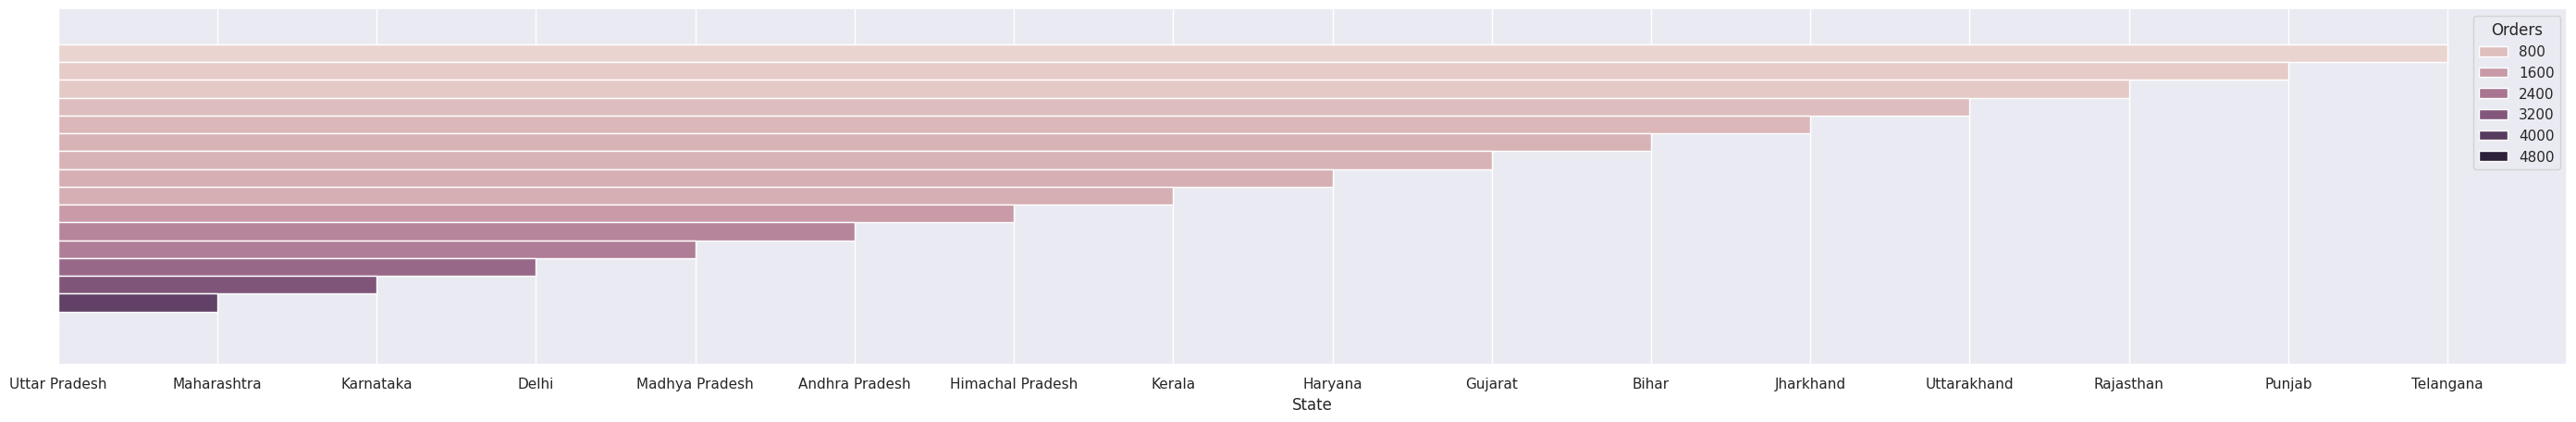

In [ ]:
sns.set(rc={"figure.figsize":(35,5)})
sns.barplot(data=state_sales,x="State",hue="Orders")


In [ ]:
#Insight: Uttar Pradesh, Maharashtra, and Karnataka lead in number of orders, indicating strong market presence in these states. Regional marketing campaigns and faster delivery options in these high-performing states could further boost sales.

In [ ]:
##Total Sales Amount by State

In [ ]:
state_amount=df.groupby("State", as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

<Axes: xlabel='State'>

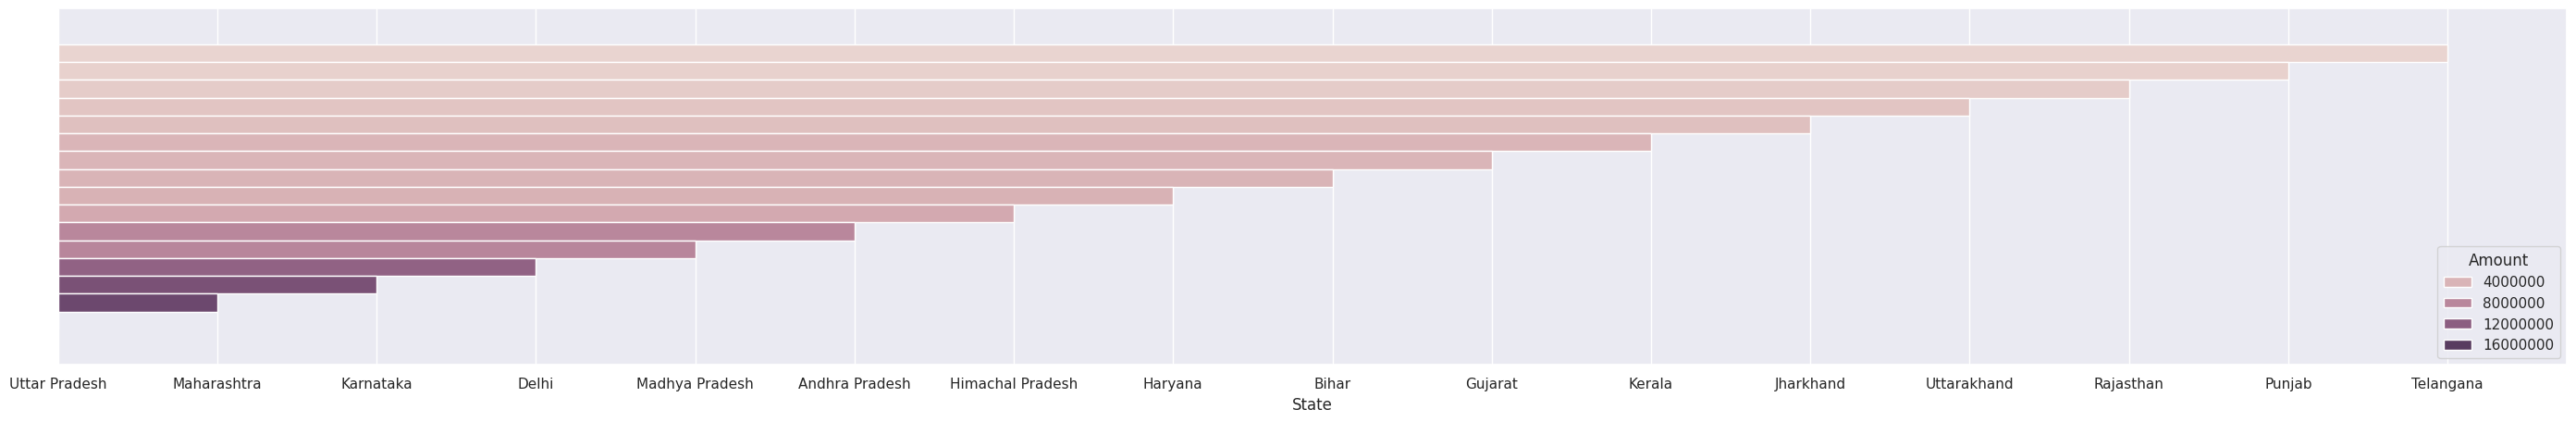

In [ ]:
sns.set(rc={"figure.figsize":(35,5)})
sns.barplot(data=state_amount,x="State",hue="Amount")


In [ ]:
#Insight: Uttar Pradesh, Maharashtra, and Karnataka generate the highest revenue, confirming they are our most valuable markets. These states should receive priority for inventory allocation, premium product launches, and promotional campaigns.

In [ ]:
##Marital Status Distribution

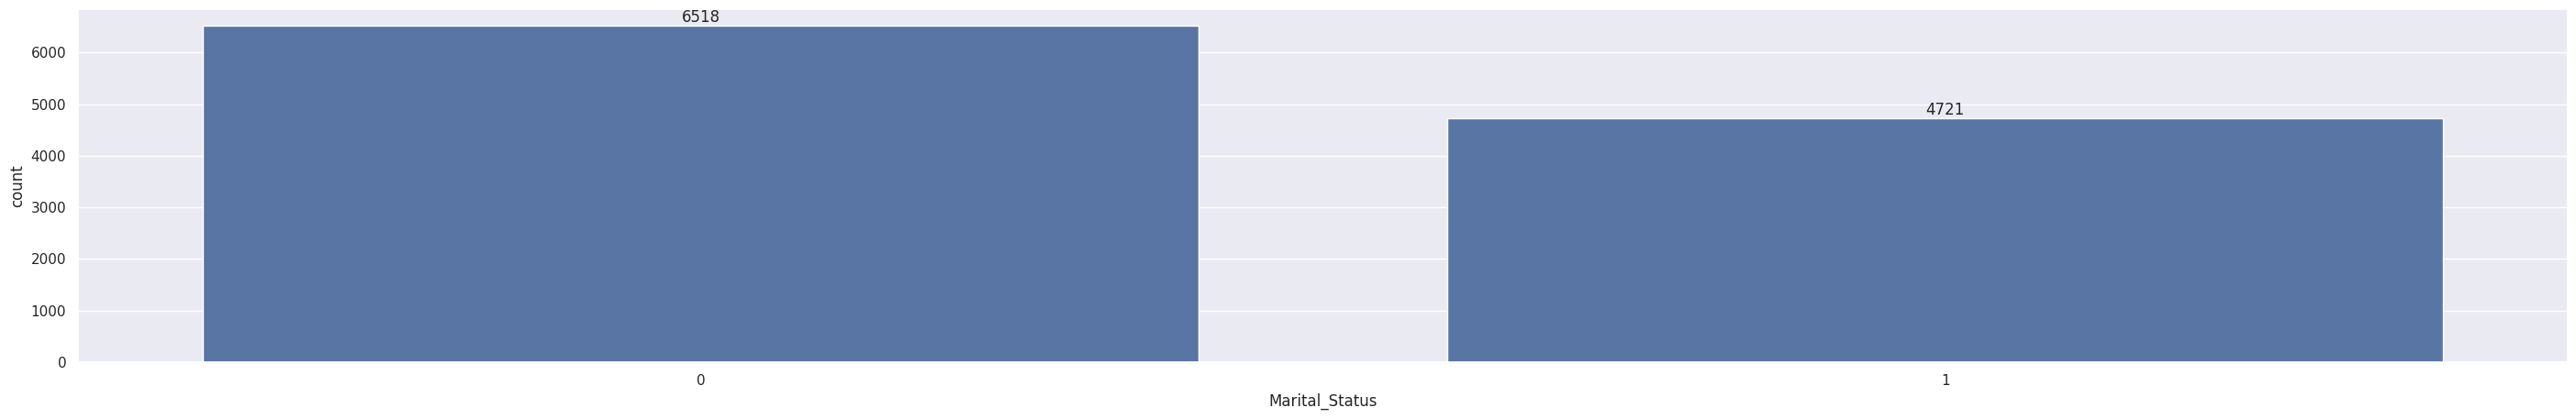

In [ ]:
ax=sns.countplot(data = df,x="Marital_Status")
sns.set(rc={"figure.figsize":(6,5)})
for bars in ax.containers:
  ax.bar_label(bars)

In [ ]:
#Insight: Married customers (6518) outnumber unmarried customers (4721) by approximately 38%. Married individuals likely have higher purchasing power and different product needs, making them a valuable target segment for family-oriented products.

In [ ]:
##Sales Amount by Marital Status and Gender

In [ ]:
sales_state=df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

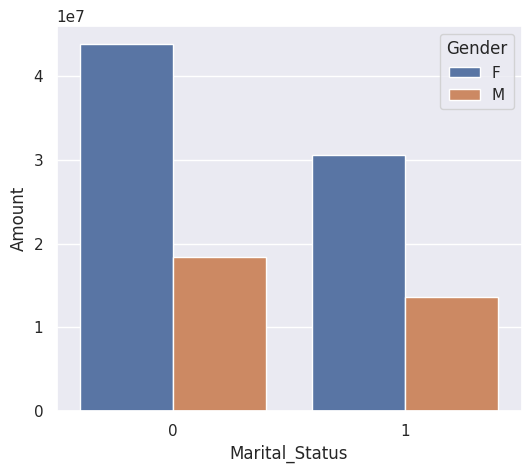

In [ ]:
sns.barplot(data=sales_state,x = "Marital_Status",y = "Amount",hue = "Gender")


In [ ]:
# Insight: Married females contribute the highest sales amount, followed by married males. This indicates that married women are our most valuable customer segment and should be the primary focus for targeted advertising and product recommendations.

In [ ]:
##Sales by Occupation

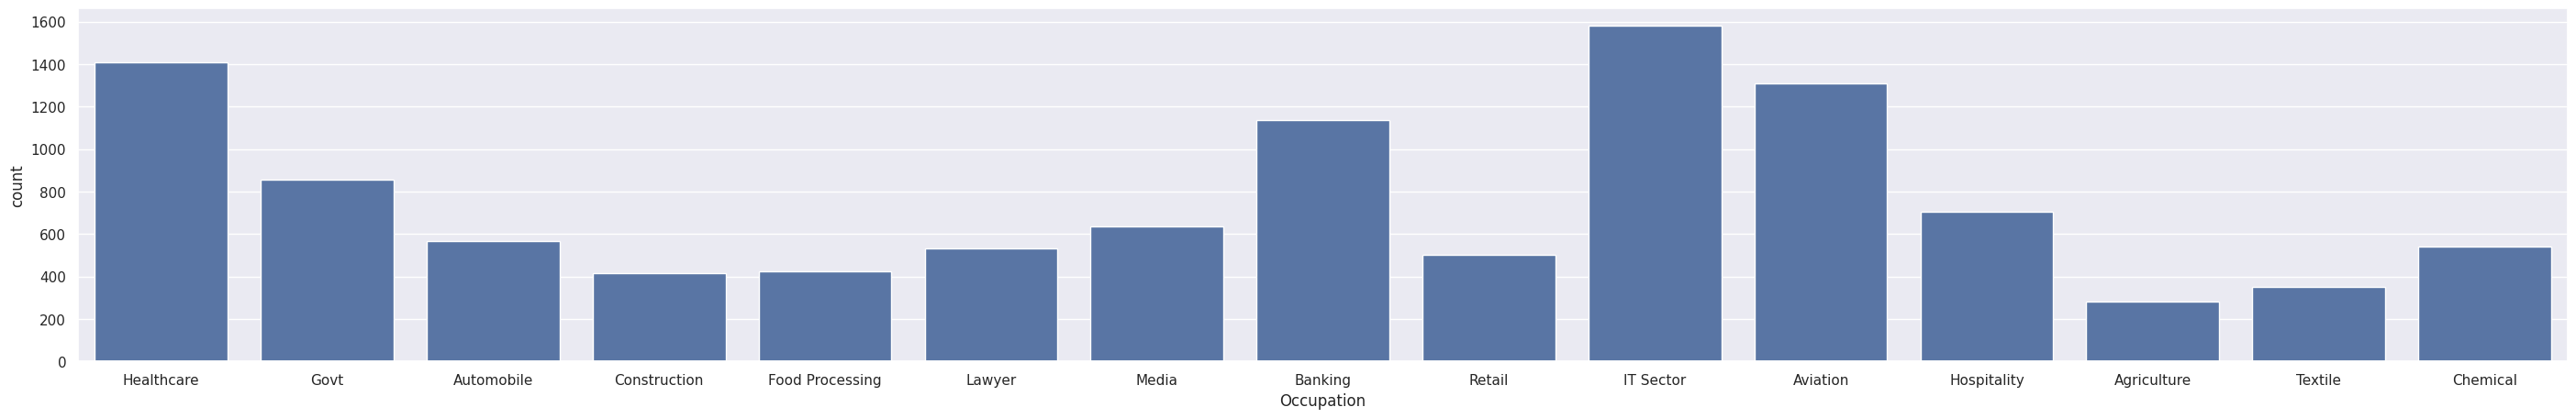

In [ ]:
sns.countplot(data=df,x="Occupation")
sns.set(rc={"figure.figsize":(35,5)})
for bars in ax.containers:
  ax.bar_label(bars)

In [ ]:
## Insight: IT Sector, Healthcare, and Aviation professionals have the highest number of orders. These occupations represent our core customer base and should be prioritized in professional networking campaigns and targeted advertisements.

In [ ]:
##Total Sales Amount by Occupation


<Axes: xlabel='Occupation', ylabel='Amount'>

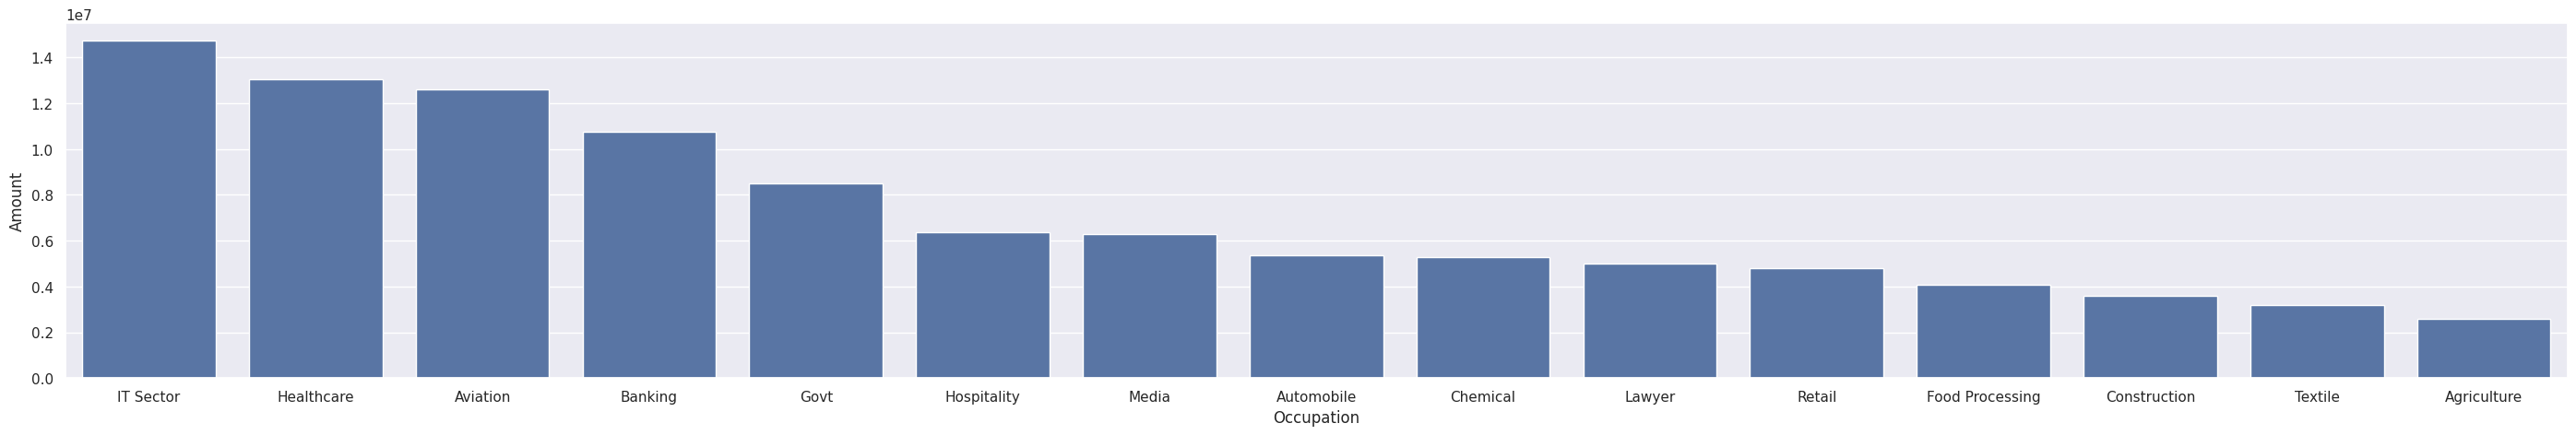

In [ ]:
occupation_sales=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(data=occupation_sales,x="Occupation",y="Amount")

In [ ]:
# Insight: IT Sector, Healthcare, and Aviation professionals generate the highest revenue despite not always having the most orders. These high-value occupations should receive premium product offerings and exclusive deals to maximize revenue.

In [ ]:
##Sales by Product Category

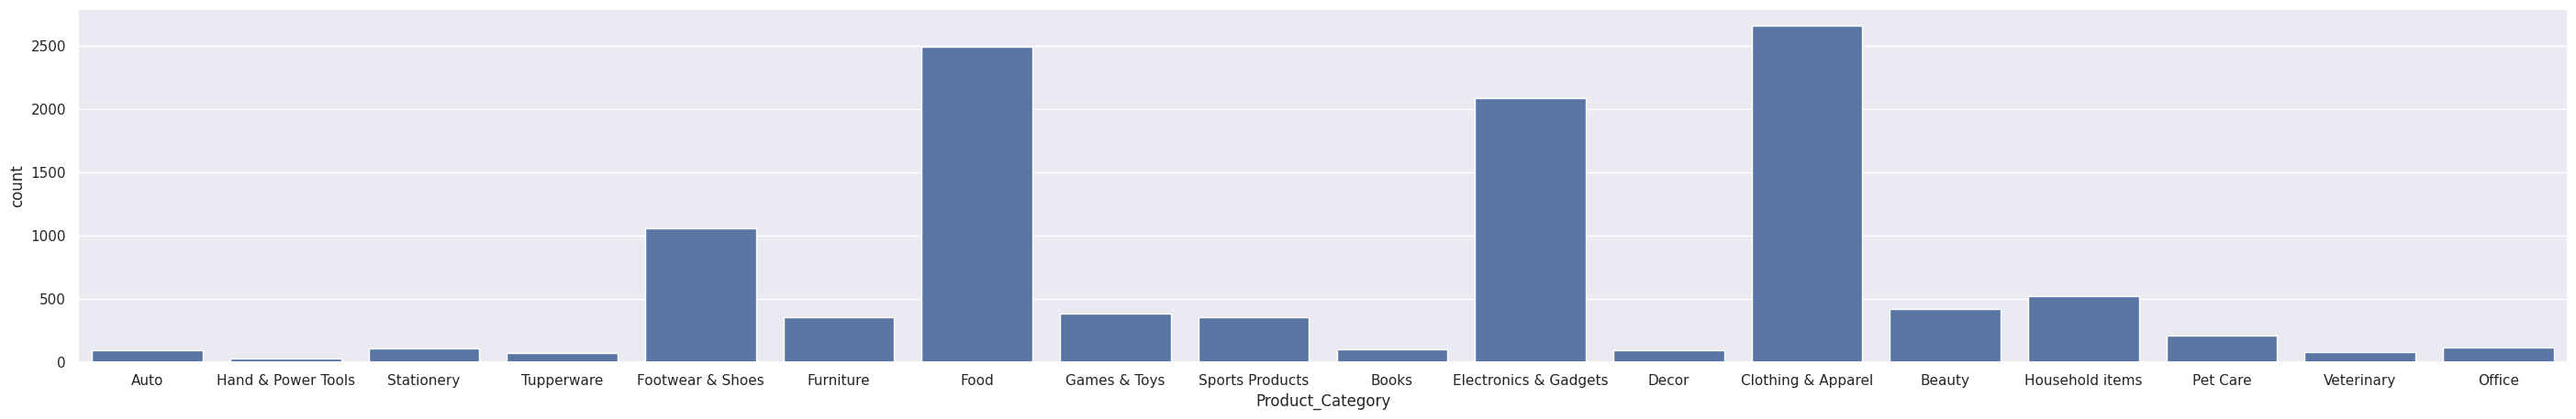

In [ ]:
sns.countplot(data=df,x="Product_Category")
sns.set(rc={"figure.figsize":(35,5)})
for bars in ax.containers:
  ax.bar_label(bars)

In [ ]:
# Insight: Clothing & Apparel, Food, and Electronics & Gadgets are the most frequently purchased categories. These popular categories should maintain strong inventory levels and receive prominent placement in marketing campaigns.

In [ ]:
##Total Sales Amount by Product Category

<Axes: xlabel='Product_Category', ylabel='Amount'>

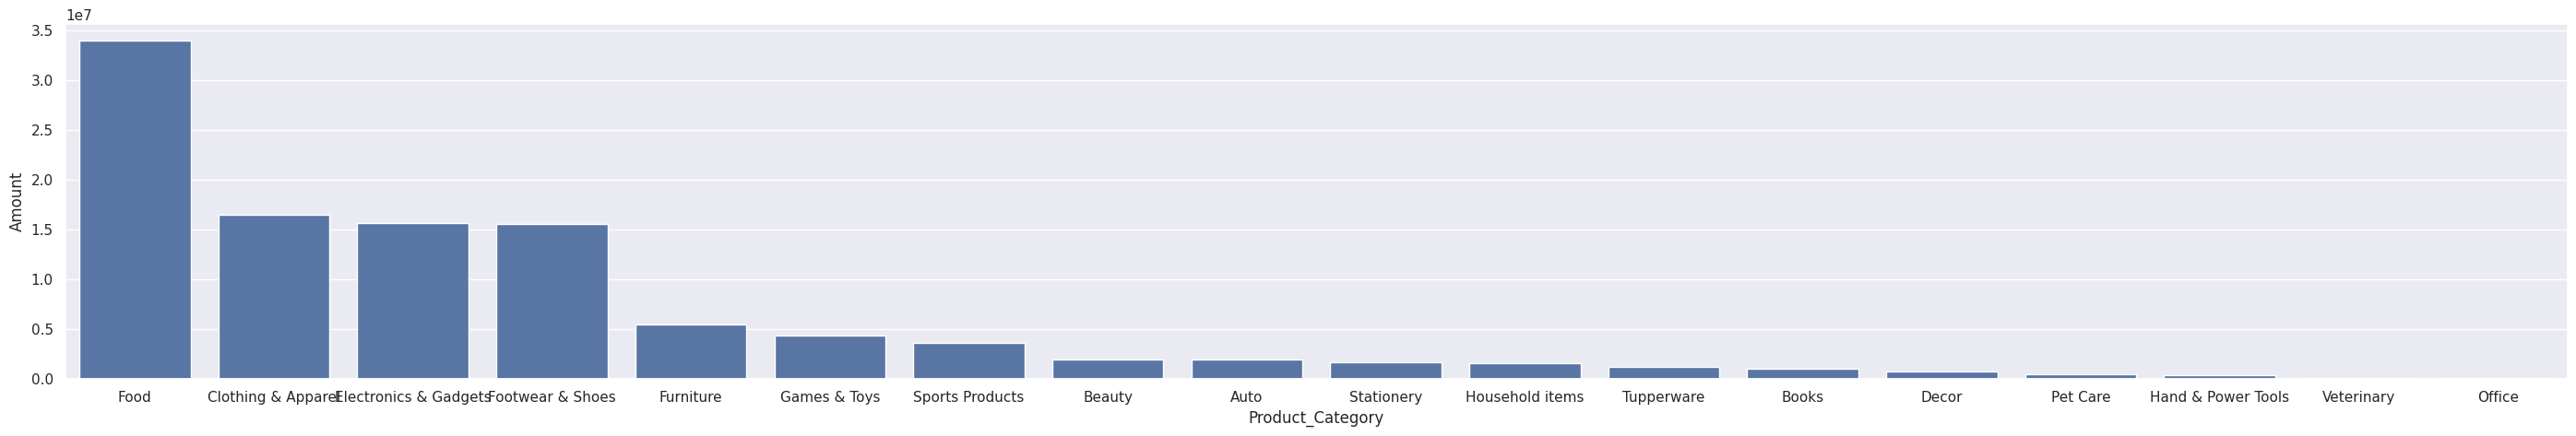

In [ ]:
product_sales=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(data=product_sales,x="Product_Category",y="Amount")

In [ ]:
# Insight: Food, Clothing & Apparel, and Electronics & Gadgets generate the highest revenue. These top-performing categories are driving business growth and should receive increased investment in inventory, variety, and promotional activities.

In [ ]:
#CONCLUSION - Write at the VERY BOTTOM
#Add it AFTER your last chart and insight:
# Insight: Food, Clothing & Apparel, and Electronics & Gadgets generate the highest revenue...

# ← ADD CONCLUSION HERE

# CONCLUSION
# Key Findings:
# 1. Primary customers: Married females aged 26-35 from Uttar Pradesh, Maharashtra, Karnataka
# 2. Top occupations: IT Sector, Healthcare, Aviation professionals
# 3. Best-selling categories: Food, Clothing & Apparel, Electronics & Gadgets
#
# Recommendations:
# - Focus marketing campaigns on married women in 26-35 age group
# - Target IT, Healthcare, and Aviation professionals with premium products
# - Maintain strong inventory in Food, Clothing, and Electronics categories
# - Prioritize Uttar Pradesh, Maharashtra, and Karnataka for regional campaigns